In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
from sklearn import metrics

In [374]:
import warnings
warnings.filterwarnings("ignore")

In [376]:
from sklearn.datasets import load_iris
iris = load_iris()

### Проверка того, что данные корректно загружены

iris

In [379]:
iris_df = pd.DataFrame(iris.data)

In [380]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Разведочный анализ данных
### Просматриваем информацию о наших данных

In [384]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [387]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Просматриваем доступные для нас значение, для выявления возможных не корректных данных 

In [389]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Работа с локтевым графиков, для определения оптимального количества кластеров K-means


In [391]:
X = iris_df.iloc[:, [1,2,3,4]].values

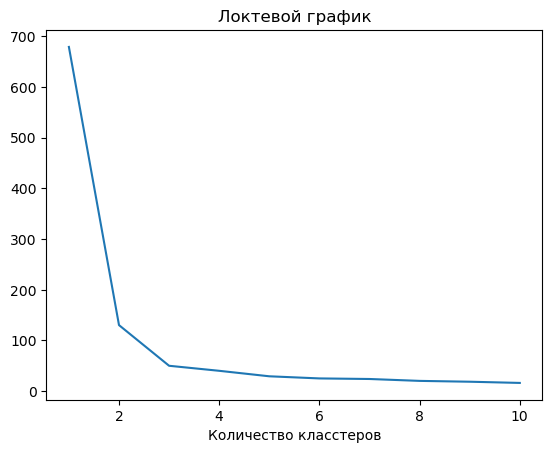

In [392]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Локтевой график')
plt.xlabel('Количество класстеров')

plt.show()

#### Результат Локтевого графика, видим изгиб на между индексом 2 и 4, изгиб будет находиться на индексе 3

In [472]:
num_classter = 3

In [474]:
kmeans = KMeans(init='k-means++', n_clusters=num_classter, n_init=200)

In [476]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=200)

In [477]:
pred=kmeans.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [478]:
print(f'Silhouette score = {metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))}')

Silhouette score = 0.6554751988865172


### Просмотрим визуально на то, как распределились наши класстеры

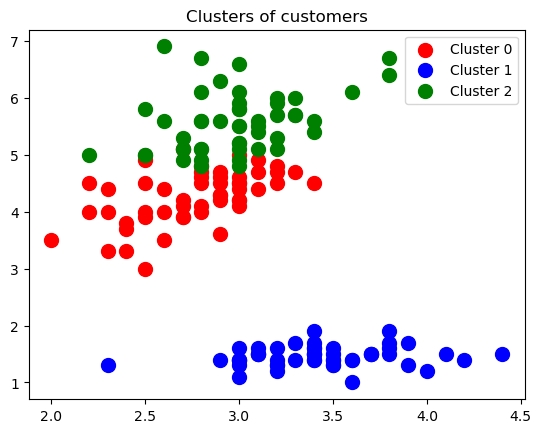

In [401]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Clusters of customers')

plt.legend()
plt.show()

#### Наблюдаем результат предсказывания

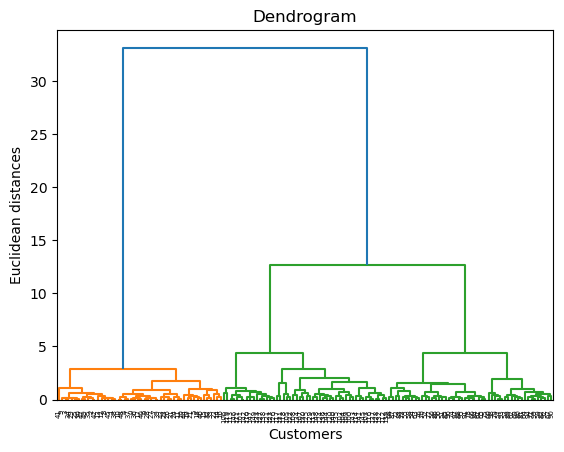

In [465]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Ниже мы добавим новый столбец, у каждого типа цветка, будет свой кластер

In [404]:
labels=kmeans.labels_
iris_df['cluster'] = pd.Series(labels)

In [405]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [406]:
iris_df[iris_df['cluster']==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
50,7.0,3.2,4.7,1.4,1,versicolor,0
51,6.4,3.2,4.5,1.5,1,versicolor,0
52,6.9,3.1,4.9,1.5,1,versicolor,0
53,5.5,2.3,4.0,1.3,1,versicolor,0
54,6.5,2.8,4.6,1.5,1,versicolor,0
55,5.7,2.8,4.5,1.3,1,versicolor,0
56,6.3,3.3,4.7,1.6,1,versicolor,0
57,4.9,2.4,3.3,1.0,1,versicolor,0
58,6.6,2.9,4.6,1.3,1,versicolor,0
59,5.2,2.7,3.9,1.4,1,versicolor,0


In [408]:
iris_df[iris_df['cluster']==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1
5,5.4,3.9,1.7,0.4,0,setosa,1
6,4.6,3.4,1.4,0.3,0,setosa,1
7,5.0,3.4,1.5,0.2,0,setosa,1
8,4.4,2.9,1.4,0.2,0,setosa,1
9,4.9,3.1,1.5,0.1,0,setosa,1


In [409]:
iris_df[iris_df['cluster']==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
100,6.3,3.3,6.0,2.5,2,virginica,2
101,5.8,2.7,5.1,1.9,2,virginica,2
102,7.1,3.0,5.9,2.1,2,virginica,2
103,6.3,2.9,5.6,1.8,2,virginica,2
104,6.5,3.0,5.8,2.2,2,virginica,2
105,7.6,3.0,6.6,2.1,2,virginica,2
107,7.3,2.9,6.3,1.8,2,virginica,2
108,6.7,2.5,5.8,1.8,2,virginica,2
109,7.2,3.6,6.1,2.5,2,virginica,2
110,6.5,3.2,5.1,2.0,2,virginica,2


### Просмотрим в каком количестве распределились наши кластеры:

In [413]:
count_sort_0 = (iris_df['cluster'] == 0).sum()
print("Первый тип:", count_sort_0)

count_sort_1 = (iris_df['cluster'] == 1).sum()
print("Второй тип:" ,count_sort_1)

count_sort_2 = (iris_df['cluster'] == 2).sum()
print("Третий тип:",count_sort_2)

Первый тип: 51
Второй тип: 50
Третий тип: 49


# Обучим модель DBSCAN

In [415]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
dbscan = DBSCAN(eps=1, min_samples=3)  
pred = dbscan.fit_predict(X)

print("Метки кластеров:", pred)

Метки кластеров: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [416]:
silhouette_avg = metrics.silhouette_score(X, pred, metric='euclidean')
print(f'Silhouette score = {silhouette_avg}')

Silhouette score = 0.6560711920879914


In [417]:
iris_df['cluster_DBSCAN'] = pd.Series(pred)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster,cluster_DBSCAN
0,5.1,3.5,1.4,0.2,0,setosa,1,0
1,4.9,3.0,1.4,0.2,0,setosa,1,0
2,4.7,3.2,1.3,0.2,0,setosa,1,0
3,4.6,3.1,1.5,0.2,0,setosa,1,0
4,5.0,3.6,1.4,0.2,0,setosa,1,0


In [418]:
count_sort_0 = (iris_df['cluster_DBSCAN'] == 0).sum()
print("Первый тип:", count_sort_0)

count_sort_1 = (iris_df['cluster_DBSCAN'] == 1).sum()
print("Второй тип:" ,count_sort_1)

count_sort_2 = (iris_df['cluster_DBSCAN'] == 2).sum()
print("Третий тип:",count_sort_2)

Первый тип: 50
Второй тип: 50
Третий тип: 50


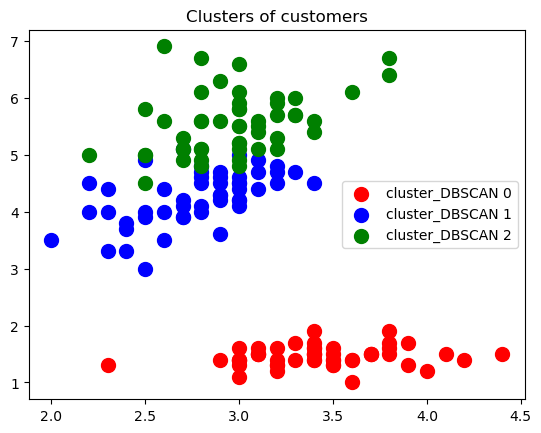

In [419]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'cluster_DBSCAN 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'cluster_DBSCAN 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'cluster_DBSCAN 2')

plt.title('Clusters of customers')

plt.legend()
plt.show()

# Обучим модель Gaussian Mixture Models

In [421]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

num_clusters = 3

gmm = GaussianMixture(n_components=num_clusters, random_state=42)
pred = gmm.fit_predict(X)

print("Метки кластеров:", pred)


Метки кластеров: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [422]:
silhouette_avg = metrics.silhouette_score(X, pred, metric='euclidean')
print(f'Silhouette score = {silhouette_avg}')

Silhouette score = 0.6560711920879914


In [459]:
iris_df['cluster_gmm'] = pd.Series(pred)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster,cluster_DBSCAN,cluster_gmm
0,5.1,3.5,1.4,0.2,0,setosa,1,0,1
1,4.9,3.0,1.4,0.2,0,setosa,1,0,1
2,4.7,3.2,1.3,0.2,0,setosa,1,0,1
3,4.6,3.1,1.5,0.2,0,setosa,1,0,1
4,5.0,3.6,1.4,0.2,0,setosa,1,0,1


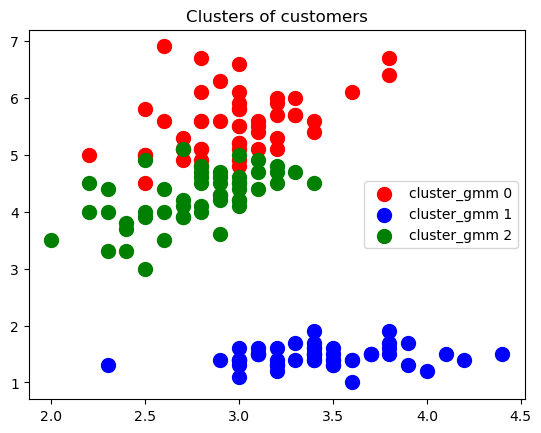

In [461]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'cluster_gmm 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'cluster_gmm 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'cluster_gmm 2')

plt.title('Clusters of customers')

plt.legend()
plt.show()

In [462]:
count_sort_0 = (iris_df['cluster_gmm'] == 0).sum()
print("Первый тип:", count_sort_0)

count_sort_1 = (iris_df['cluster_gmm'] == 1).sum()
print("Второй тип:" ,count_sort_1)

count_sort_2 = (iris_df['cluster_gmm'] == 2).sum()
print("Третий тип:",count_sort_2)

Первый тип: 50
Второй тип: 50
Третий тип: 50


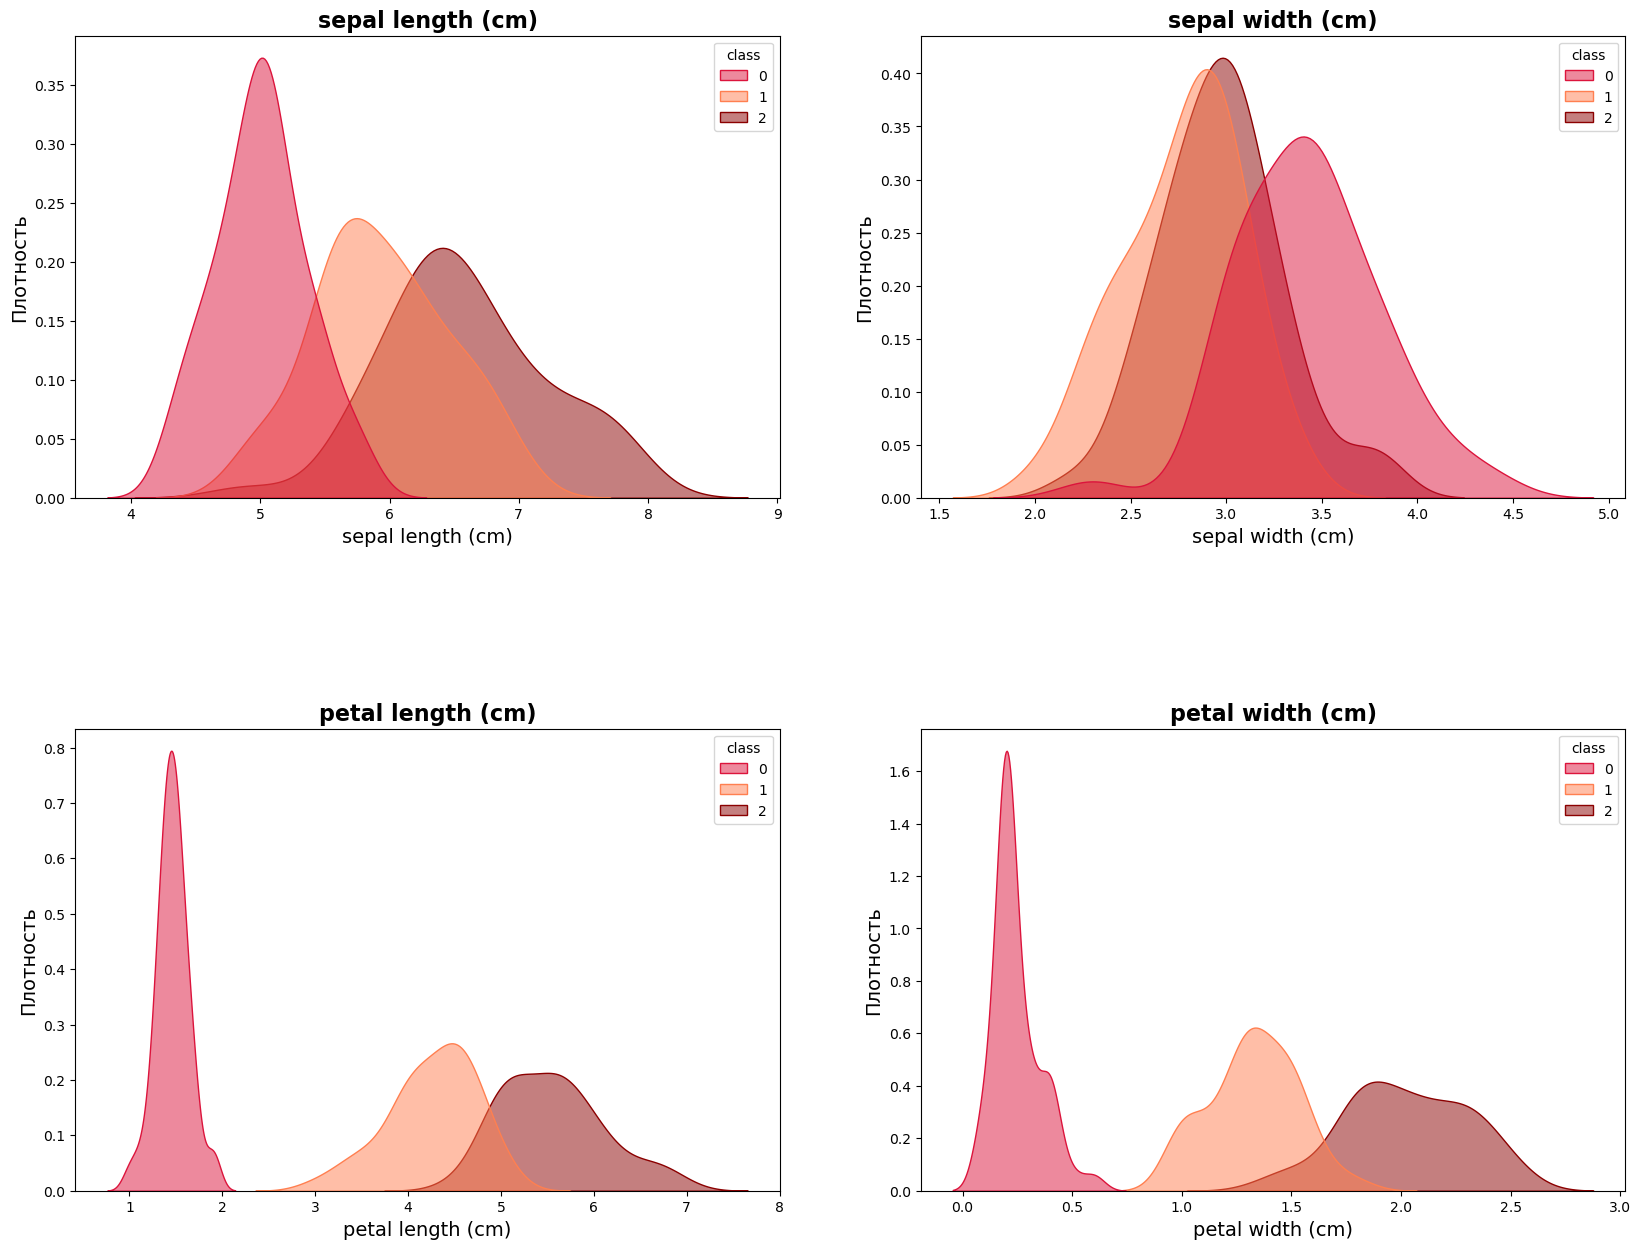

In [489]:
df = pd.DataFrame(data=iris_df, columns=iris.feature_names)
df['class'] = iris_df.target 
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

plt.subplots_adjust(hspace=0.5)


columns = df.columns[:-1]

for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data=df,
                palette=['#DC143C', '#FF7F50', '#8B0000'],
                x=column,
                fill=True,
                alpha=0.5,
                hue='class',
                ax=ax)
    
    ax.set_title(column, fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Плотность', fontsize=14)

plt.show()

# Вывод:

в данной работе были проделан следуюище действия:

Подключения модулей для работы
После чего мы проанализировали данные
совершили работу с локтевым методом
обучили модели
проработали и отобразили графически распределения данных

модель K-means = 0.6554
Модель DBSCAN = 0.6560
Модель Gaussian Mixture Models = 0.6560

Модель KMeans показала себя хуже всех, допустив 2 ошибки
Остальные 2 модели, показыли одинаковый результат 
 